In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [4]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_fine_tuned.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(
    model_name,
    adapter_name_or_path,
    load_in_4bit,
    data_path,
    results_path,
    use_english_datasets,
    max_new_tokens,
)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results_fine_tuned.csv False 300


In [5]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading: /Users/inflaton/code/engd/papers/rapget-translation/eval_modules/calc_repetitions.py
loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 74 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/epochs-01                            1133 non-null   object
 3   Qwen/Qwen2-7B-Instruct/epochs-01                                  1133 non-null   object
 4   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-01               1133 non-null   object
 5   shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-01                   1133 non-null   object
 6   internlm/internlm2_5-7b-chat/epochs-02                            1133 non-null   object
 7   internlm/internlm2_5-7b-chat/epochs-03    

In [6]:
result_columns = [col for col in df.columns[2:].to_list() if "rpp" in col]
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.06',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.08',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.10',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.02',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.04',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.06',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.08',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.10',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat

In [7]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.06',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.08',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.10',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.02',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.04',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.06',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.08',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.10',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
  'shenzhi-wang/Llama3

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 38 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00                   1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02                   1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04                   1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.06                   1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.08                   1133 non-null   object
 7   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp

In [9]:
variant = "rpp"
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant=variant)
metrics_df

['Qwen/Qwen2-72B-Instruct' 'Qwen/Qwen2-7B-Instruct'
 'internlm/internlm2_5-7b-chat' 'shenzhi-wang/Llama3.1-70B-Chinese-Chat'
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat'
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat']


A new version of the following files was downloaded from https://huggingface.co/internlm/internlm2_5-7b-chat:
- tokenization_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/internlm/internlm2_5-7b-chat:
- tokenization_internlm2_fast.py
- tokenization_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00: {'meteor': 0.47787926577615836, 'sacrebleu': {'score': 18.8752463277632, 'counts': [14723, 6807, 3764, 2191], 'totals': [28355, 27222, 26089, 24960], 'precisions': [51.923822958913775, 25.005510249063256, 14.427536509640078, 8.778044871794872], 'bp': 0.937334361537056, 'sys_len': 28355, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.18875246327763195, 'precisions': [0.5192382295891377, 0.25005510249063256, 0.1442753650964008, 0.08778044871794871], 'brevity_penalty': 0.937334361537056, 'length_ratio': 0.9392182842000663, 'translation_length': 28355, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.5043720290058811, 'rouge2': 0.2655478848615153, 'rougeL': 0.4504707077365074, 'rougeLsum': 0.45046372274793184}, 'accuracy': 0.01412180052956752, 'correct_ids': [41, 77, 133, 193, 199, 272, 348, 413, 567, 658, 712, 778, 893, 952, 1011, 1036]}
Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02: {'meteor': 0.47747216449453805, 'sacrebleu': {'sc

model   rpp    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct  1.00  0.477879  18.875246   
1                     Qwen/Qwen2-72B-Instruct  1.02  0.477472  18.860812   
2                     Qwen/Qwen2-72B-Instruct  1.04  0.475146  18.555137   
3                     Qwen/Qwen2-72B-Instruct  1.06  0.467986  17.943489   
4                     Qwen/Qwen2-72B-Instruct  1.08  0.461162  17.159688   
5                     Qwen/Qwen2-72B-Instruct  1.10  0.454810  16.460748   
6                      Qwen/Qwen2-7B-Instruct  1.00  0.445196  15.448398   
7                      Qwen/Qwen2-7B-Instruct  1.02  0.441687  15.275826   
8                      Qwen/Qwen2-7B-Instruct  1.04  0.441018  14.978039   
9                      Qwen/Qwen2-7B-Instruct  1.06  0.430463  14.216912   
10                     Qwen/Qwen2-7B-Instruct  1.08  0.422858  13.548612   
11                     Qwen/Qwen2-7B-Instruct  1.10  0.415892  13.028638   
12               internlm/internlm2_5-7b-chat  1.00  0.429150  15.096431   
13               internlm/internlm2_5-7b-chat  1.02  0.427085  14.444810   
14               internlm/internlm2_5-7b-chat  1.04  0.417029  13.695764   
15               internlm/internlm2_5-7b-chat  1.06  0.402292  12.198244   
16               internlm/internlm2_5-7b-chat  1.08  0.388262  11.099801   
17               internlm/internlm2_5-7b-chat  1.10  0.375962  10.355853   
18     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.460783  17.844903   
19     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.457659  17.507110   
20     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.457504  17.558568   
21     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.451544  16.805524   
22     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  0.446277  16.417393   
23     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  0.438094  15.516734   
24      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00  0.434412  15.359736   
25      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02  0.432523  15.299640   
26      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04  0.432503  15.000285   
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06  0.426892  14.428999   
28      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08  0.420853  13.958377   
29      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10  0.412435  13.262186   
30  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.406359  13.545948   
31  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.406512  13.356159   
32  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.406123  13.351680   
33  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.402115  13.109844   
34  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.397246  12.816180   
35  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.394014  12.371357   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.188752  0.450471        0.0          0.081200           0.081200   
1   0.188608  0.450845        0.0          0.081200           0.081200   
2   0.185551  0.447905        0.0          0.054722           0.054722   
3   0.179435  0.441078        0.0          0.030009           0.030009   
4   0.171597  0.434002        0.0          0.066196           0.066196   
5   0.164607  0.426240        0.0          0.057370           0.057370   
6   0.154484  0.419194        0.0          1.830538           1.830538   
7   0.152758  0.417589        0.0          1.136805           1.136805   
8   0.149780  0.415538        0.0          0.157988           0.157988   
9   0.142169  0.405915        0.0          0.203001           0.203001   
10  0.135486  0.397244        0.0          0.194175           0.194175   
11  0.130286  0.389875        0.0          0.177405           0.177405   
12  0.150964  0.411693        0.0          1.579876           1.579876   
13  0.144448  0.407331        0.0          1.338923           1.338923   
14  0.136958  0.398463        0.0          1.343336           1.343336   
15  0.121982  0.387280        0.0          

In [10]:
time_df = load_eval_times("logs", total_entries=len(df), variant=variant)
time_df

Loading content of logs/l40-1gpu-epoch-1.txt
Loading content of logs/l40-1gpu-fine-tuned.txt
Loading content of logs/l40-1gpu-rpp-1.txt
Loading content of logs/l40-1gpu-rpp-2.txt
Loading content of logs/l40-1gpu-rpp-3.txt
Loading content of logs/l40-1gpu.txt
Error processing log file: logs/l40-1gpu.txt
'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data
Loading content of logs/l40-4gpu-1.txt
Loading content of logs/l40-4gpu-2.txt
Loading content of logs/l40-4gpu-3.txt
Loading content of logs/l40-4gpu-4.txt
Loading content of logs/l40-4gpu-5.txt
Loading content of logs/l40-4gpu-6.txt
Loading content of logs/l40-4gpu-7.txt
Loading content of logs/openai-gpt-4o-mini-fine-tuned.txt
Loading content of logs/openai-gpt-4o-mini.txt
Loading content of logs/openai-gpt-4o.txt
Loading content of logs/openai-training-sample.jsonl
Loading content of logs/tune-qwen2-70b.txt


model   rpp  eval_time
6                internlm/internlm2_5-7b-chat  1.00   1.252427
7                      Qwen/Qwen2-7B-Instruct  1.00   1.078553
8   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00   1.187114
9       shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00   1.102383
10               internlm/internlm2_5-7b-chat  1.02   1.285966
11               internlm/internlm2_5-7b-chat  1.04   1.281553
12               internlm/internlm2_5-7b-chat  1.06   1.283319
13               internlm/internlm2_5-7b-chat  1.08   1.306267
14               internlm/internlm2_5-7b-chat  1.10   1.309797
15                     Qwen/Qwen2-7B-Instruct  1.02   1.046778
16                     Qwen/Qwen2-7B-Instruct  1.04   1.026478
17                     Qwen/Qwen2-7B-Instruct  1.06   1.017652
18                     Qwen/Qwen2-7B-Instruct  1.08   1.015004
19                     Qwen/Qwen2-7B-Instruct  1.10   1.023831
20  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02   1.188879
21  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04   1.179170
22  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06   1.173875
23  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08   1.175640
24  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10   1.181818
25      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02   1.134157
26      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04   1.100618
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06   1.090909
28      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08   1.100618
29      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10   1.107679
30     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  16.178288
31     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  15.968226
32     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  16.050309
33     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  15.972639
34     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  15.998235
35     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  16.018535
36                    Qwen/Qwen2-72B-Instruct  1.00  15.977935
37                    Qwen/Qwen2-72B-Instruct  1.02  15.785525
38                    Qwen/Qwen2-72B-Instruct  1.04  15.759047
39                    Qwen/Qwen2-72B-Instruct  1.06  15.851721
40                    Qwen/Qwen2-72B-Instruct  1.08  15.924095
41                    Qwen/Qwen2-72B-Instruct  1.10  15.984996

In [11]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", variant], how="left")
metrics_df

model   rpp    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct  1.00  0.477879  18.875246   
1                     Qwen/Qwen2-72B-Instruct  1.02  0.477472  18.860812   
2                     Qwen/Qwen2-72B-Instruct  1.04  0.475146  18.555137   
3                     Qwen/Qwen2-72B-Instruct  1.06  0.467986  17.943489   
4                     Qwen/Qwen2-72B-Instruct  1.08  0.461162  17.159688   
5                     Qwen/Qwen2-72B-Instruct  1.10  0.454810  16.460748   
6                      Qwen/Qwen2-7B-Instruct  1.00  0.445196  15.448398   
7                      Qwen/Qwen2-7B-Instruct  1.02  0.441687  15.275826   
8                      Qwen/Qwen2-7B-Instruct  1.04  0.441018  14.978039   
9                      Qwen/Qwen2-7B-Instruct  1.06  0.430463  14.216912   
10                     Qwen/Qwen2-7B-Instruct  1.08  0.422858  13.548612   
11                     Qwen/Qwen2-7B-Instruct  1.10  0.415892  13.028638   
12               internlm/internlm2_5-7b-chat  1.00  0.429150  15.096431   
13               internlm/internlm2_5-7b-chat  1.02  0.427085  14.444810   
14               internlm/internlm2_5-7b-chat  1.04  0.417029  13.695764   
15               internlm/internlm2_5-7b-chat  1.06  0.402292  12.198244   
16               internlm/internlm2_5-7b-chat  1.08  0.388262  11.099801   
17               internlm/internlm2_5-7b-chat  1.10  0.375962  10.355853   
18     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.460783  17.844903   
19     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.457659  17.507110   
20     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.457504  17.558568   
21     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.451544  16.805524   
22     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  0.446277  16.417393   
23     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  0.438094  15.516734   
24      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00  0.434412  15.359736   
25      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02  0.432523  15.299640   
26      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04  0.432503  15.000285   
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06  0.426892  14.428999   
28      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08  0.420853  13.958377   
29      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10  0.412435  13.262186   
30  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.406359  13.545948   
31  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.406512  13.356159   
32  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.406123  13.351680   
33  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.402115  13.109844   
34  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.397246  12.816180   
35  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.394014  12.371357   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.188752  0.450471        0.0          0.081200           0.081200   
1   0.188608  0.450845        0.0          0.081200           0.081200   
2   0.185551  0.447905        0.0          0.054722           0.054722   
3   0.179435  0.441078        0.0          0.030009           0.030009   
4   0.171597  0.434002        0.0          0.066196           0.066196   
5   0.164607  0.426240        0.0          0.057370           0.057370   
6   0.154484  0.419194        0.0          1.830538           1.830538   
7   0.152758  0.417589        0.0          1.136805           1.136805   
8   0.149780  0.415538        0.0          0.157988           0.157988   
9   0.142169  0.405915        0.0          0.203001           0.203001   
10  0.135486  0.397244        0.0          0.194175           0.194175   
11  0.130286  0.389875        0.0          0.177405           0.177405   
12  0.150964  0.411693        0.0          1.579876           1.579876   
13  0.144448  0.407331        0.0          1.338923           1.338923   
14  0.136958  0.398463        0.0          1.343336           1.343336   
15  0.121982  0.387280        0.0          

In [12]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat'], dtype=object)

In [13]:
# list of markers for plotting
markers = [
    "o",
    "x",
    "^",
    "s",
    "d",
    "P",
    "X",
    "*",
    "v",
    ">",
    "<",
    "p",
    "h",
    "H",
    "+",
    "|",
    "_",
]
markers = {model: marker for model, marker in zip(models, markers)}

In [14]:
model_orders = {
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [15]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    columns,
    titles,
    log_scales=[False, False],
    sync_y_axis=False,
):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df[variant]]
        for i, column in enumerate(columns):
            current_ax = twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Repetition Penalty Parameter (RPP)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(
        zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]]
    )
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.67 if len(columns) > 1 else -0.4),
    )

    plt.show()

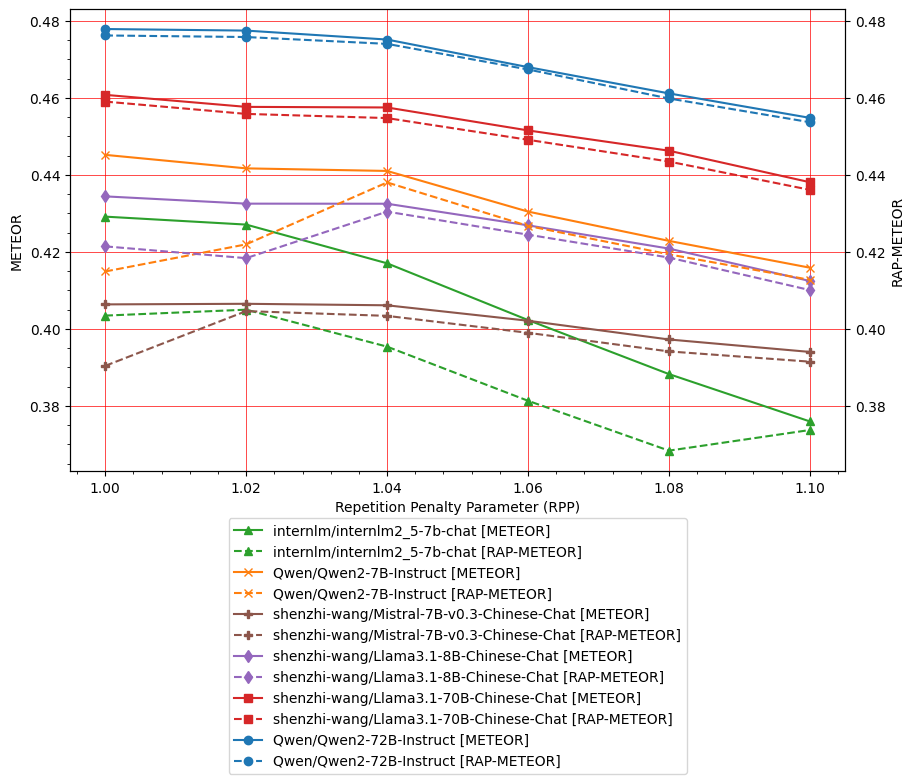

In [16]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "rap"],
    ["METEOR", "RAP-METEOR"],
    sync_y_axis=True,
)

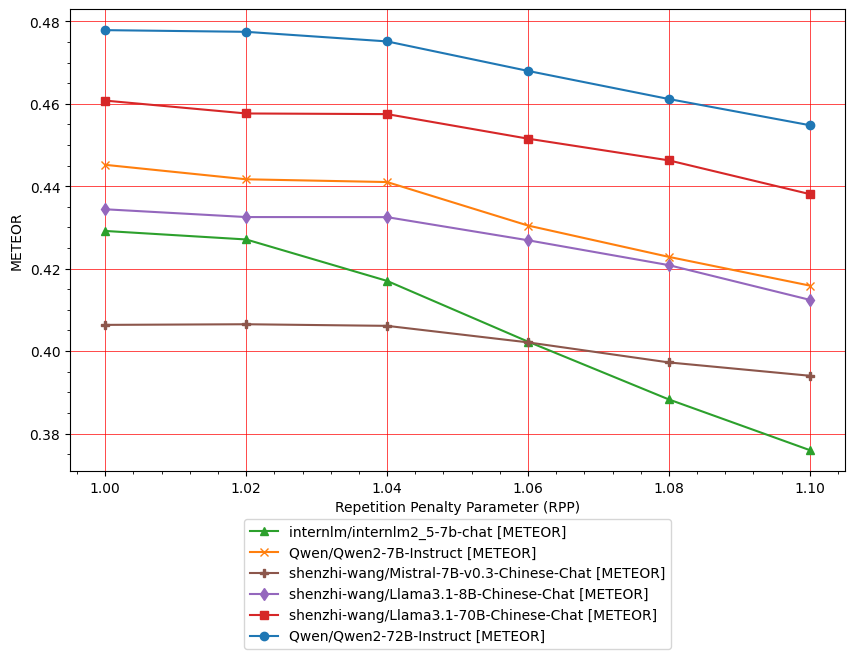

In [17]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor"],
    ["METEOR"],
)

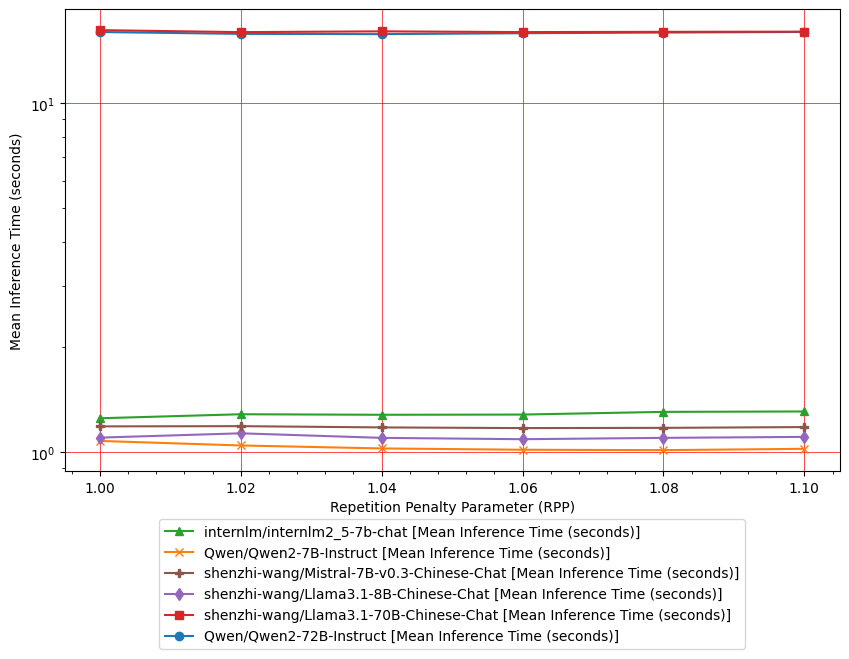

In [18]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Inference Time (seconds)"],
    log_scales=[True],
)

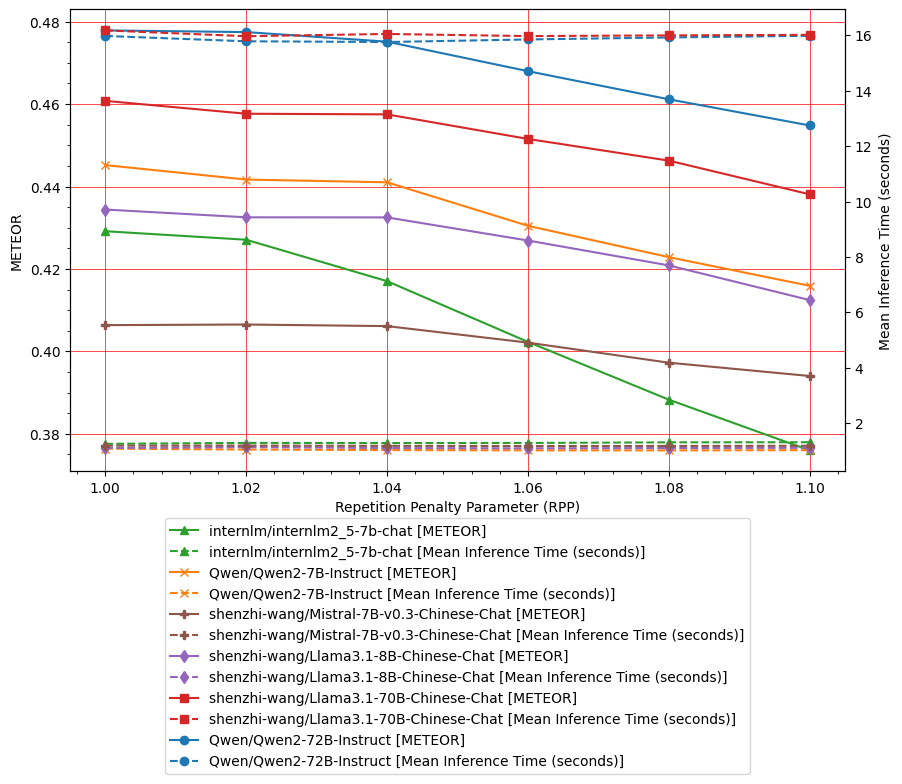

In [19]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
)

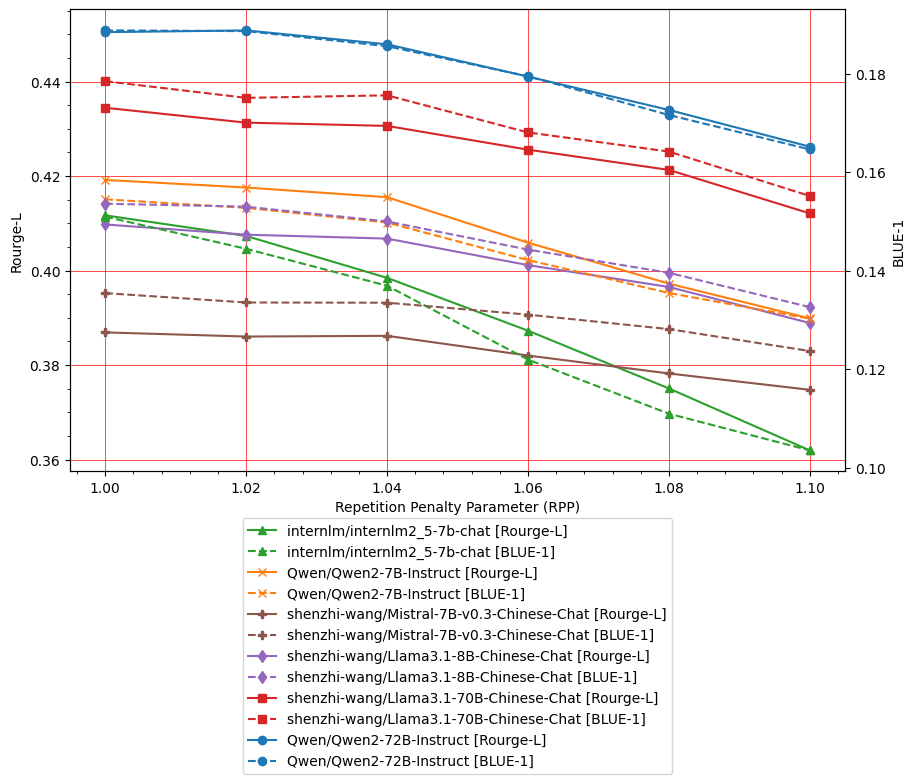

In [20]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

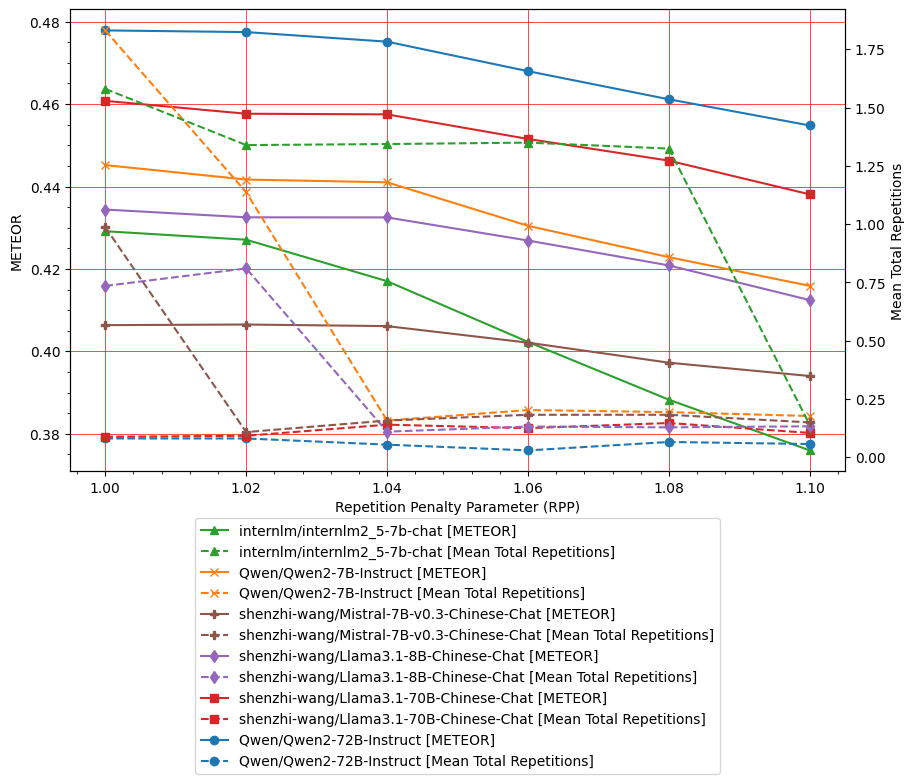

In [21]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "total_repetitions"],
    ["METEOR", "Mean Total Repetitions"],
)

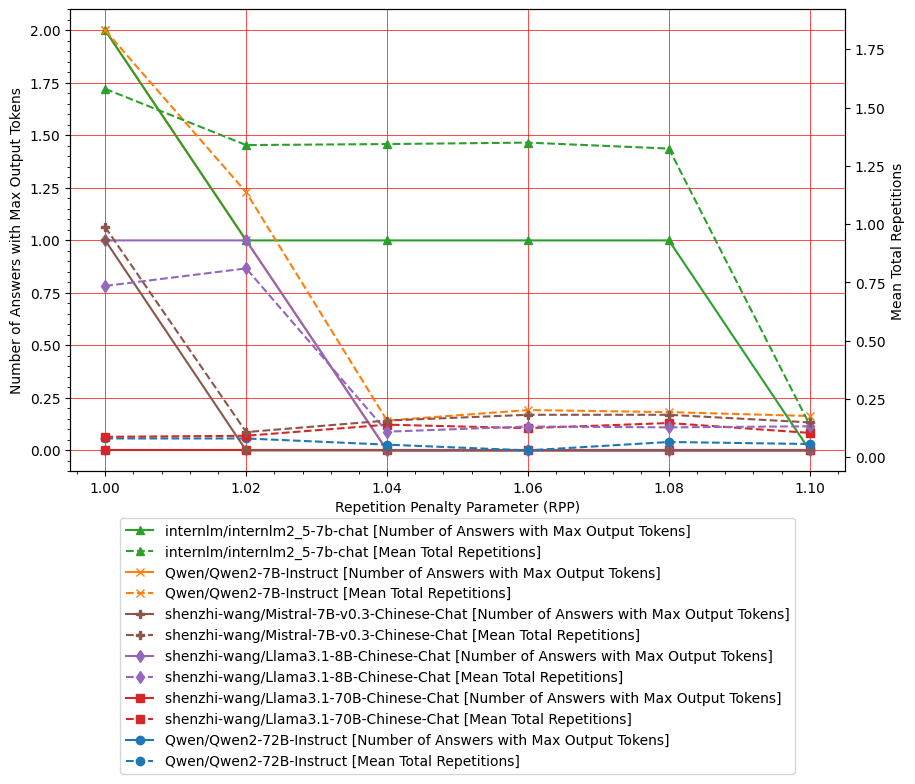

In [22]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["num_max_output_tokens", "total_repetitions"],
    ["Number of Answers with Max Output Tokens", "Mean Total Repetitions"],
)

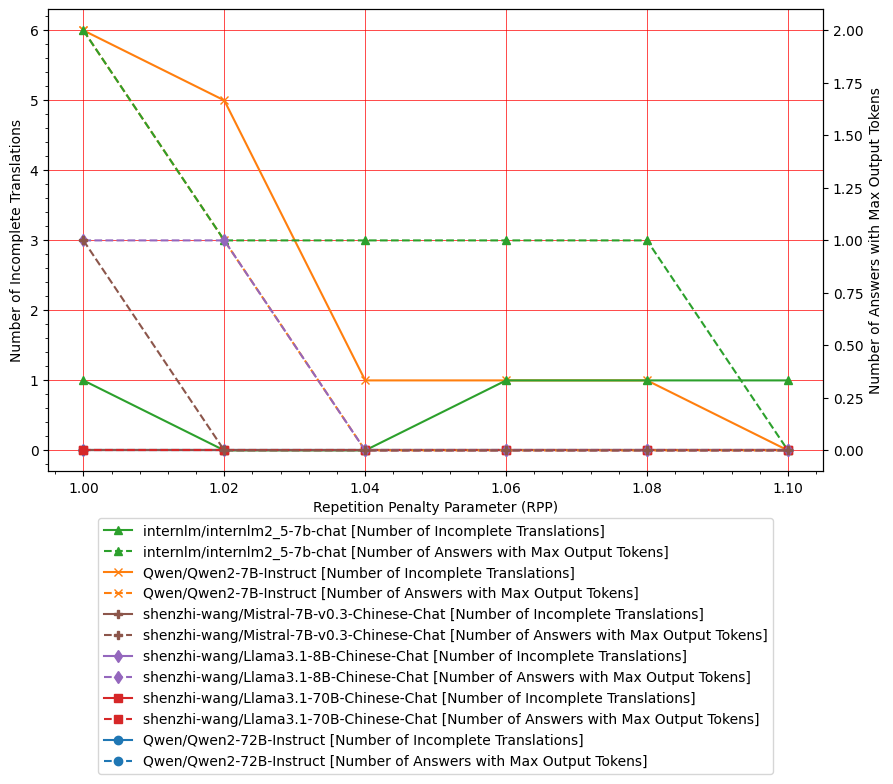

In [23]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["num_incomplete_translations", "num_max_output_tokens"],
    ["Number of Incomplete Translations", "Number of Answers with Max Output Tokens"],
)

In [24]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00

*** Found 0 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00

*** Found 0 rows with incomplete translations for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00
### Analyzing: Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02

*** Found 0 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02

*** Found 0 rows with incomplete translations for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02
### Analyzing: Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04

*** Found 0 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04

*** Found 0 rows with incomplete 

In [25]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [26]:
metrics_df.describe()

meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  36.000000  36.000000  36.000000  36.000000       36.0   
mean    0.431533  14.965363   0.149654   0.408277        0.0   
std     0.026403   2.173934   0.021739   0.023099        0.0   
min     0.375962  10.355853   0.103559   0.361934        0.0   
25%     0.410954  13.355040   0.133550   0.388499        0.0   
50%     0.431483  14.989162   0.149892   0.407467        0.0   
75%     0.452360  16.546942   0.165469   0.425759        0.0   
max     0.477879  18.875246   0.188752   0.450845        0.0   

       repetition_score  total_repetitions        rap  \
count         36.000000          36.000000  36.000000   
mean           0.435079           0.435079   0.424237   
std            0.537733           0.537733   0.029565   
min            0.030009           0.030009   0.368371   
25%            0.107679           0.107679   0.403431   
50%            0.148720           0.148720   0.420391   
75%            0.753972           0.753972   0.450257   
max            1.830538           1.830538   0.476207   

       num_incomplete_translations  num_max_output_tokens  eval_time  
count                    36.000000              36.000000  36.000000  
mean                      0.500000               0.333333   6.086668  
std                       1.298351               0.585540   7.078247  
min                       0.000000               0.000000   1.015004  
25%                       0.000000               0.000000   1.101942  
50%                       0.000000               0.000000   1.220653  
75%                       0.250000               1.000000  15.869815  
max                       6.000000               2.000000  16.178288